# Data and Programming Foundations for AI: Final Personal Project

## 1.0 Summary

As a capstone to the Data and Programming Foundations for AI course, run by Codecademy, students are encouraged to design and implement a personal project that uses skills learnt from the course. 

After browsing on Kaggle, I found a dataset which is personally interesting and able to provide a deep insight into relationships between countries, their wealth, happiness and other socio-economic factors. 

## 2.0 Project Scoping

The project workflow should proceed as follows:
* Find dataset
* Define approximate goals to achieve with the dataset
* Clean dataset
* Perform exploratory data analysis
* Communicate findings

Goals can continue to be redefined throughout the process, as the capabilities of the dataset become more apparent, and further avenues for exploration come from the analysis results.

## 3.0 Selection of Data Analysis Problem

With the dataset, World Happiness Report 2006-2020, I'd like to explore relationships between countries' wealth and socio-economic factors like happiness, life expectancy. 

## 4.0 Data Collection


The dataset comes from https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021/data. 

It contains one dataset ranging from 2006 to 2020, and another just for the year 2021. For simplicity I will just use the former.

The first steps will be to bring in the data and inspect it and any possible ways to clean it. 

In [590]:
import pandas as pd
import numpy as np

# Import life expectqncy csv and have a first look at the columns and types of responses within
df = pd.read_csv('world_happiness_report.csv')
print(df.head())
print(df.tail())


  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0        

I'll analyse the columns and their data types next.

In [617]:
# Analyse the columns and their data types for any anomalistic figures that stick out
print(df.describe())
print(df.dtypes)

              year  life_ladder  log_gdp_per_capita  social_support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.25800

To see how many missing values there are, I'll run an isnull comand.

In [620]:
# Compute missing values per column
print(df.isnull().sum())

# Compute proportion of missing values
print(df.isnull().mean())

country_name                          0
year                                  0
life_ladder                           0
log_gdp_per_capita                   36
social_support                       13
healthy_life_expectancy_at_birth     55
freedom_to_make_life_choices         32
generosity                           89
perceptions_of_corruption           110
positive_affect                      22
negative_affect                      16
dtype: int64
country_name                        0.000000
year                                0.000000
life_ladder                         0.000000
log_gdp_per_capita                  0.018471
social_support                      0.006670
healthy_life_expectancy_at_birth    0.028220
freedom_to_make_life_choices        0.016419
generosity                          0.045664
perceptions_of_corruption           0.056439
positive_affect                     0.011288
negative_affect                     0.008209
dtype: float64


### Initial Observations:
* There are 1949 observations in the dataset, with most columns exhibiting some missing values.
    * The data is not missing much - at most only 5% of values in perceptions of corruption. This is potentially telling that certain countries don't allow for a voiced opinion on this subject. It will be interesting to develop another data frame that lists these countries to see what that means.
    * Most instances of missing data seem to be missing at random, though it would also be worth a check to see if there are sequential years from the same countries with missing values, to suggest a lack of reporting, other than data that is missing at random. 
* All the columns are the correct data type, so the data set is tidy enough in that regard.

## 5.0 Data Wrangling and Tidying

### 5.1 Cleansing the data

I'll clean and tidy the dataset by:
* Standardising column names
* Checking for duplicates and dropping them 

This will be best done in a function that I can run once and pass through the dataset.

In [593]:
# Define function that runs through my tidying steps
def cleanse(dataset):
    #Standardising column names
    dataset.columns = dataset.columns.str.lower().str.strip().str.replace(" ", "_")
    # Checking for duplicates
    if df.duplicated().any():
        duplicate_amount = df.duplicated().sum()
        df.drop_duplicates(inplace=True)
        print(f"There were {duplicate_amount} duplicated rows. The duplicates have been removed.")
    else:
        print("No duplicates found.")
    # Converting data types
    dataset.country_name = dataset.country_name.astype(str)
    return df

print(cleanse(df))
print(df.dtypes)

No duplicates found.
     country_name  year  life_ladder  log_gdp_per_capita  social_support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      healthy_life_expectancy_at_birth  freedom_to_make_life_choic

### 5.2 Dealing with missing values

#### 5.2.1 Dropping missing completely at random (MCAR) values

Resummarising the missing values per column below, I'll visualise the missing values to see if there is any correspondence for variable (vertically) or for country (horizontally). Any column values that have a small amount of missing data, or whose presence in the heat map doesn't appear to be related to other variables or dependent on a horizontal country value, I will drop them. 

country_name                          0
year                                  0
life_ladder                           0
log_gdp_per_capita                   36
social_support                       13
healthy_life_expectancy_at_birth     55
freedom_to_make_life_choices         32
generosity                           89
perceptions_of_corruption           110
positive_affect                      22
negative_affect                      16
dtype: int64


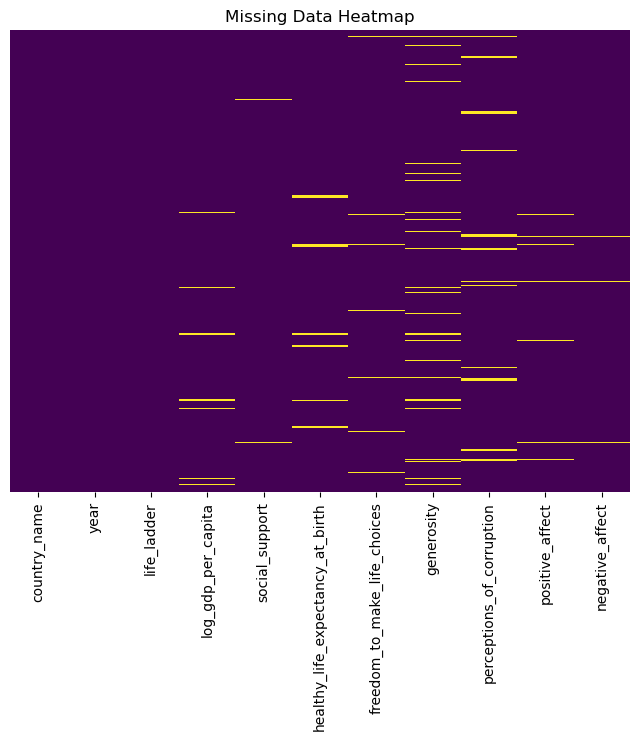

In [594]:
# Count missing values per column
print(df.isnull().sum())

# Visualise missing data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


In [595]:
# Define function that cleans data frame by dropping values from columns that have missing values unrelated to other variables (missing completely at random)
def dropped_values(df):
    df_dropped = df.dropna(subset=['social_support', 'freedom_to_make_life_choices', 'positive_affect', 'negative_affect'])
    print("Original shape:", df.shape)
    print("New shape:", df_dropped.shape)
    return df_dropped

df_cleaned = dropped_values(df)
print(df_cleaned)

# Count final missing values per column as a check of the remaining missing values I suspect are not missing completely at random
print(df_cleaned.isnull().sum())


Original shape: (1949, 11)
New shape: (1899, 11)
     country_name  year  life_ladder  log_gdp_per_capita  social_support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      healthy_life_expectancy_at_birth

#### 5.2.2 Imputing missing values

##### 5.2.2.1 Log GDP per capita values

In [596]:
def impute_missing_value(dataframe, variable, impute_type):
    # Count missing values for each country
    missing_value = dataframe[dataframe[variable].isnull()].groupby('country_name').size()
    print(f"Countries with number of missing {variable} values:\n{missing_value.sort_values(ascending=False)}")
    
    # Count total entries per country
    total_value_per_country = dataframe.groupby('country_name').size()

    # Calculate the percentage of each country's missing variable
    missing_percentage_value = missing_value / total_value_per_country * 100
    print(f"Percentage of missing {variable} values from total values:\n{missing_percentage_value.sort_values(ascending=False)}")

    # Compute global and country statistical value (mean, median or mode)
    if impute_type == 'mean':
        global_stat = dataframe[variable].mean()
        country_stat = dataframe.groupby('country_name')[variable].transform('mean')
    elif impute_type == 'median':
        global_stat = dataframe[variable].median()
        country_stat = dataframe.groupby('country_name')[variable].transform('median')
    elif impute_type == 'mode':
        global_stat = dataframe[variable].mode()[0]
        country_stat = dataframe.groupby('country_name')[variable].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    else:
        raise ValueError("impute_type must be 'mean', 'median', or 'mode'")
    print(f"Global {impute_type} for {variable}: {global_stat}")

    # Fill missing variable with country statistical value first
    dataframe.loc[:, variable] = dataframe[variable].fillna(country_stat)

    # Fill missing variable with global statistical value
    dataframe.loc[:, variable] = dataframe[variable].fillna(global_stat)

    # Run a check to see that there are no missing values in the column
    print(f"Missing {variable} values: {dataframe[variable].isnull().sum()}")
    print(f"Missing values:\n{dataframe.isnull().sum()}")

impute_missing_value(df_cleaned, 'log_gdp_per_capita', 'mean')

Countries with number of missing log_gdp_per_capita values:
country_name
North Cyprus                 7
Somaliland region            4
South Sudan                  4
Iran                         3
Somalia                      3
Taiwan Province of China     3
Venezuela                    3
Palestinian Territories      2
Yemen                        2
Cuba                         1
Cyprus                       1
Hong Kong S.A.R. of China    1
Kosovo                       1
Malta                        1
dtype: int64
Percentage of missing log_gdp_per_capita values from total values:
country_name
Cuba                 100.0
North Cyprus         100.0
Somalia              100.0
Somaliland region    100.0
South Sudan          100.0
                     ...  
Uruguay                NaN
Uzbekistan             NaN
Vietnam                NaN
Zambia                 NaN
Zimbabwe               NaN
Length: 164, dtype: float64
Global mean for log_gdp_per_capita: 9.371632313472894
Missing log_gdp_per_c

##### Healthy life expectancy at birth values

In [597]:
impute_missing_value(df_cleaned, 'healthy_life_expectancy_at_birth', 'mean')

Countries with number of missing healthy_life_expectancy_at_birth values:
country_name
Kosovo                       13
Hong Kong S.A.R. of China    11
Taiwan Province of China     10
Palestinian Territories       9
North Cyprus                  7
Somaliland region             4
dtype: int64
Percentage of missing healthy_life_expectancy_at_birth values from total values:
country_name
Hong Kong S.A.R. of China    100.000000
Kosovo                       100.000000
North Cyprus                 100.000000
Somaliland region            100.000000
Taiwan Province of China      76.923077
                                ...    
Venezuela                           NaN
Vietnam                             NaN
Yemen                               NaN
Zambia                              NaN
Zimbabwe                            NaN
Length: 164, dtype: float64
Global mean for healthy_life_expectancy_at_birth: 63.347487262872626
Missing healthy_life_expectancy_at_birth values: 0
Missing values:
country_na

##### Missing generosity values

In [598]:
impute_missing_value(df_cleaned, 'generosity', 'mean')

Countries with number of missing generosity values:
country_name
North Cyprus                 7
Iran                         5
Venezuela                    4
South Sudan                  4
Somaliland region            4
Kuwait                       3
Taiwan Province of China     3
Palestinian Territories      3
Somalia                      3
Yemen                        2
Brazil                       2
Bahrain                      2
Japan                        2
Germany                      2
Poland                       1
Romania                      1
South Korea                  1
Rwanda                       1
Nepal                        1
Spain                        1
Sweden                       1
United Arab Emirates         1
United Kingdom               1
United States                1
Netherlands                  1
Australia                    1
Mexico                       1
Malta                        1
Belgium                      1
Cuba                         1
Cypru

##### Perceptions of corruption values

In [599]:
impute_missing_value(df_cleaned, 'perceptions_of_corruption', 'mean')

Countries with number of missing perceptions_of_corruption values:
country_name
Saudi Arabia            12
China                   10
United Arab Emirates     8
Turkmenistan             8
Jordan                   8
Kuwait                   6
Egypt                    6
Bahrain                  5
Malta                    5
Yemen                    3
Libya                    2
Qatar                    2
Uzbekistan               2
Cambodia                 1
Ethiopia                 1
Singapore                1
South Africa             1
Sweden                   1
Cuba                     1
Congo (Brazzaville)      1
Vietnam                  1
dtype: int64
Percentage of missing perceptions_of_corruption values from total values:
country_name
China            100.000000
Cuba             100.000000
Turkmenistan     100.000000
Saudi Arabia      85.714286
Jordan            80.000000
                    ...    
United States           NaN
Uruguay                 NaN
Venezuela               NaN
Z

I'd like to compare the correlations between variables both before and after the data cleaning and imputation, to gauge if the process has affected the story of the data. I also want to create an alert system within the code to tell me if there are any significant difference in corresponding values. 

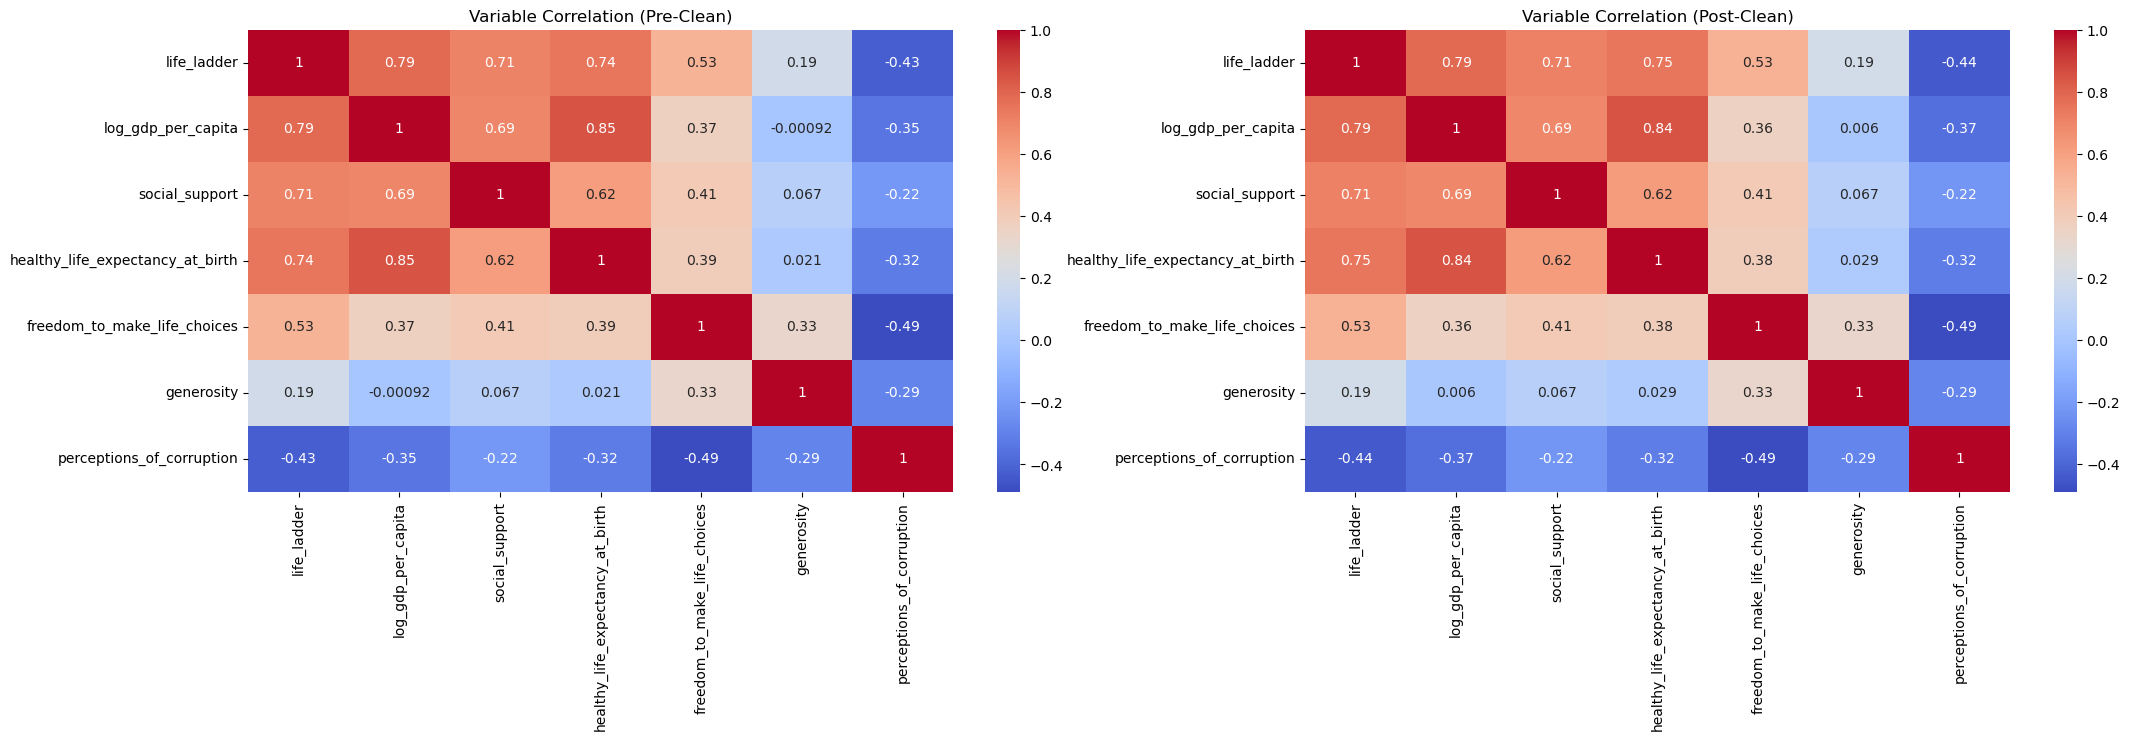

In [600]:
# Create a correlation matrix for all variables
orig_correlation_matrix = df[['life_ladder', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']].corr()
cleaned_correlation_matrix = df_cleaned[['life_ladder', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']].corr()

# Plot both correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(25, 6))

sns.heatmap(orig_correlation_matrix, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Variable Correlation (Pre-Clean)")

sns.heatmap(cleaned_correlation_matrix, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Variable Correlation (Post-Clean)")

plt.show()

# Create function that calculates distance between pre and post tiles to alert if there are with a big difference
def matrix_difference(original_matrix, cleaned_matrix):
    if original_matrix.shape != cleaned_matrix.shape:
        raise ValueError("Matrices must have the same shape to compute differences.")
    difference_matrix = cleaned_matrix - original_matrix
    significant_change = (abs(difference_matrix) > 0.04)
    for row in significant_change.index:
        for col in significant_change.columns:
            if significant_change.loc[row, col]:
                 print(f"Alert: Correlation between '{row}' and '{col}' changed by {difference_matrix.loc[row, col]:.3f}")
    
matrix_difference(cleaned_correlation_matrix, orig_correlation_matrix)

Thankfully, the correlations haven't proven to change drastically from the cleaning and imputation. I will just use the post-clean correlation matrix going forward. 

## 6.0 Exploratory Data Analysis

### 6.1 Change in variables over time

#### 6.1.1 Life ladder
The first question I'd like to ask is how have happiness levels changed over time. 

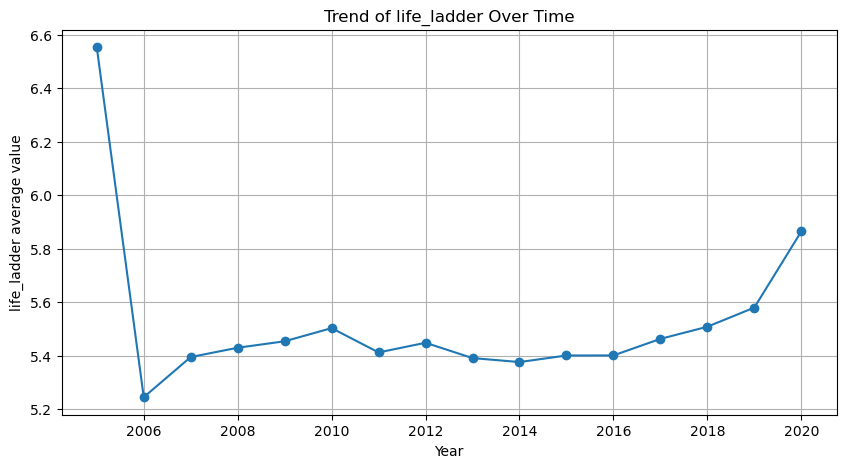

<Figure size 640x480 with 0 Axes>

In [601]:
# Define function that plots variable values over time
def variable_plot_old(dataframe, variable):
    # Compute average global variable per year
    average_variable = dataframe.groupby("year")[variable].mean()

    # Plot line chart
    plt.figure(figsize=(10,5))
    plt.plot(average_variable.index, average_variable.values, marker='o', linestyle='-')
    plt.xlabel("Year")
    plt.ylabel(f"{variable} average value")
    plt.title(f"Trend of {variable} Over Time")  # Added title for clarity
    plt.grid(True)
    plt.show()
    plt.clf()

variable_plot_old(df_cleaned, 'life_ladder')

There seems to be a significant outlier in the first part of the line graph. 

In [ ]:
# Show mean year value for life ladder
print(df_cleaned.groupby('year')['life_ladder'].mean())

# Sort data frame by showing max life ladder value for country in 2005
df_2005_max = df_cleaned[df_cleaned['year'] == 2005].groupby('country_name', as_index=False)['life_ladder'].max()
print(df_2005_max)

# Calculate number of countries measured per year
print(df_cleaned.groupby('year')['country_name'].nunique())


year
2005    6.553478
2006    5.244059
2007    5.394388
2008    5.429142
2009    5.453333
2010    5.502571
2011    5.411604
2012    5.447780
2013    5.390437
2014    5.375657
2015    5.400157
2016    5.400429
2017    5.462363
2018    5.507820
2019    5.579493
2020    5.864409
Name: life_ladder, dtype: float64
      country_name  life_ladder
0        Australia        7.341
1          Belgium        7.262
2           Brazil        6.637
3           Canada        7.418
4   Czech Republic        6.439
5          Denmark        8.019
6            Egypt        5.168
7           France        7.093
8          Germany        6.620
9           Greece        6.006
10         Hungary        5.194
11            Iran        5.308
12           Italy        6.854
13           Japan        6.516
14         Lebanon        5.491
15          Mexico        6.581
16     Netherlands        7.464
17          Poland        5.587
18         Romania        5.049
19           Spain        7.153
20          Swede

There is a significant change from the first year onwards in terms of number of countries measured for life ladder value. 

In [ ]:
# Describe statistical values of dataset
print(df_cleaned.groupby('year')['life_ladder'].describe())


      count      mean       std    min      25%     50%      75%    max
year                                                                   
2005   23.0  6.553478  0.873888  5.049  5.79650  6.6370  7.21600  8.019
2006   85.0  5.244059  1.093397  3.202  4.53500  5.1020  6.01200  7.672
2007   98.0  5.394388  1.016905  3.280  4.67025  5.2215  6.05300  7.834
2008  106.0  5.429142  1.187962  2.808  4.59125  5.1815  6.37500  7.971
2009  111.0  5.453333  1.037254  3.408  4.64050  5.3680  6.23550  7.683
2010  119.0  5.502571  1.136312  3.229  4.62900  5.4900  6.33050  7.771
2011  144.0  5.411604  1.084516  2.936  4.69800  5.2215  6.31450  7.788
2012  141.0  5.447780  1.119547  3.164  4.60200  5.3640  6.22100  7.776
2013  135.0  5.390437  1.183416  2.688  4.50550  5.2460  6.27800  7.594
2014  137.0  5.375657  1.174808  2.839  4.45300  5.3330  6.27500  7.508
2015  140.0  5.400157  1.124625  2.702  4.61075  5.3490  6.25750  7.603
2016  140.0  5.400429  1.148794  2.693  4.51925  5.4325  6.14550

This actually shows us that the countries introduced in later years had lower life ladder values. For simplicity's sake, I will only include values from 2006 onwards. 

year
2005    6.553478
2006    5.244059
2007    5.394388
2008    5.429142
2009    5.453333
2010    5.502571
2011    5.411604
2012    5.447780
2013    5.390437
2014    5.375657
2015    5.400157
2016    5.400429
2017    5.462363
2018    5.507820
2019    5.579493
2020    5.864409
Name: life_ladder, dtype: float64


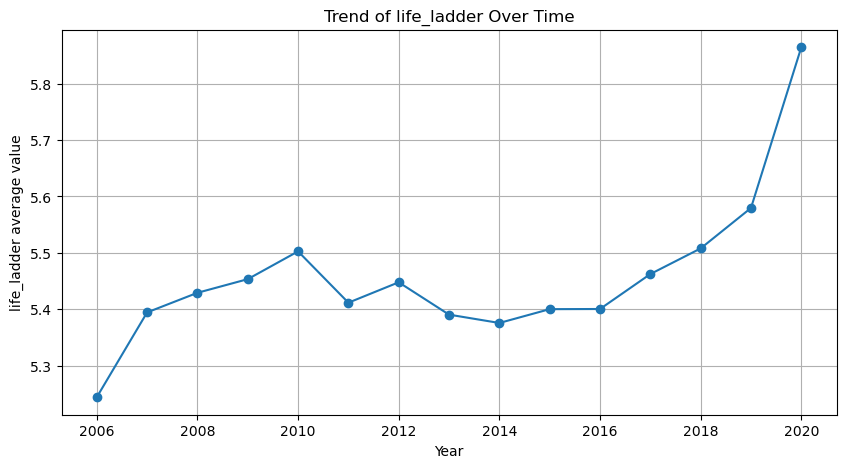

Change in life_ladder average value from 2006 to 2020: 0.6203497786211258


<Figure size 640x480 with 0 Axes>

In [604]:
def variable_plot(dataframe, variable):
    # Compute average global variable per year
    average_variable = dataframe.groupby("year")[variable].mean()
    print(average_variable)

    # Plot line chart
    plt.figure(figsize=(10,5))
    plt.plot(average_variable.index[1:], average_variable.values[1:], marker='o', linestyle='-')
    plt.xlabel("Year")
    plt.ylabel(f"{variable} average value")
    plt.title(f"Trend of {variable} Over Time")  # Added title for clarity
    plt.grid(True)
    plt.show()
    plt.clf()
    variable_change = average_variable.iloc[-1] - average_variable.iloc[1]
    print(f"Change in {variable} average value from {average_variable.index[1]} to {average_variable.index[-1]}: {abs(variable_change)}")

variable_plot(df_cleaned, 'life_ladder')

##### 6.1.1.2 Analysing change in life ladder value per country
I think it would be interesting to see max change, min change, mean change, per country for life ladder value. I'll create a function so that this could potentially be used for other variables in the EDA phase. 

In [605]:
# Define a function that creates a dateframe with statistical information on change in life ladder value over years, for each country
def value_change_stats(dataframe, variable):
    # Create a dataframe grouped by country name that shows description statistics for the variable
    dataframe_stats = dataframe.groupby("country_name")[variable].describe()

    # Compute the number of years recorded for each country
    year_span = dataframe.groupby('country_name')['year'].agg(lambda x: x.max() - x.min() + 1)

    # Add year range to the dataframe as a new column
    dataframe_stats['range'] = year_span

    # Compute most documented countries
    max_count = dataframe_stats['count'].max()
    most_documented_countries = dataframe_stats[dataframe_stats['count'] == max_count].index

    # Compute least documented countries
    min_count = dataframe_stats['count'].min()
    least_documented_countries = dataframe_stats[dataframe_stats['count'] == min_count].index

    # Compute most and least stable countries
    dataframe_sorted = dataframe.sort_values(by=['country_name', 'year'])
    dataframe_sorted['abs_change'] = dataframe_sorted.groupby('country_name')[variable].diff().abs()
    total_stat = dataframe_sorted.groupby('country_name')['abs_change'].sum()
    num_years = dataframe.groupby('country_name')['year'].nunique()
    average_change_per_year = total_stat / num_years
    most_change = average_change_per_year.nlargest(10)
    least_change = average_change_per_year.nsmallest(10)

    print(f"Most documented countries: {', '.join(most_documented_countries)} with {max_count:.0f} values.")
    print(f"Least documented countries: {', '.join(least_documented_countries)} with {min_count:.0f} values.")
    print(f"Most changed countries per year:\n{most_change}")
    print(f"Least changed countries per year:\n{least_change}")

    # Compute mean life ladder values for most changed countries
    most_change_countries_mean = dataframe_sorted.groupby('country_name')[variable].mean()
    most_change_countries_mean = most_change_countries_mean.loc[most_change.index]
    print(f"Average {variable} for most changed countries: {most_change_countries_mean}")
    
    # Compute mean life ladder values for least changed countries
    least_change_countries_mean = dataframe_sorted.groupby('country_name')[variable].mean()
    least_change_countries_mean = least_change_countries_mean.loc[least_change.index]
    print(f"Average {variable} for least changed countries: {least_change_countries_mean}")

    # Write new dataframe that shows top 10 countries for variable and provides a cumulative total for each top country
    
    # Create empty dictionary to house top 10 variable values
    top_countries_dict = {}
    
    #Loop through each unique year
    for year in dataframe['year'].unique():
        yearly_data = dataframe[dataframe['year'] == year]

        # Get the top 10 countries for the variable
        top_countries = yearly_data.nlargest(10, variable)

        # Store these results in a dictionary with country name as the index and variable as the value
        top_countries_dict[year] = top_countries.set_index('country_name')[variable]

    # Convert dictionary to dataframe
    df_top_country = pd.DataFrame(top_countries_dict)

    # Fill values for countries previously in top 10 but not in another top 10 with 0
    df_top_country.fillna(0, inplace=True)

    # Compute cumulative total column for any country that has been in the top 10
    df_top_country['cumulative_total'] = (df_top_country != 0).sum(axis=1)

    # Convert any year column into an integer
    df_top_country.columns = [int(col) if str(col).isdigit() else col for col in df_top_country.columns]

    # Separate numeric and non-numeric columns
    year_columns = [col for col in df_top_country.columns if isinstance(col, int)]
    other_columns = [col for col in df_top_country.columns if not isinstance(col, int)]
    
    # Sort numeric columns in order then have non-numeric columns
    df_top_country = df_top_country.loc[:, sorted(year_columns) + other_columns]

    # Compute 10 most frequent countries in top 10
    top_ten_top_ten = df_top_country.nlargest(10, 'cumulative_total')

    # Create empty dictionary to house bottom 10 variable values
    bottom_countries_dict = {}
    
    #Loop through each unique year
    for year in dataframe['year'].unique():
        yearly_data = dataframe[dataframe['year'] == year]

        # Get the bottom 10 countries for the variable
        bottom_countries = yearly_data.nsmallest(10, variable)

        # Store these results in a dictionary with country name as the index and variable as the value
        bottom_countries_dict[year] = bottom_countries.set_index('country_name')[variable]

    # Convert dictionary to dataframe
    df_bottom_country = pd.DataFrame(bottom_countries_dict)

    # Fill values for countries previously in bottom 10 but not in another top 10 with 0
    df_bottom_country.fillna(0, inplace=True)

    # Compute cumulative total column for any country that has been in the bottom 10
    df_bottom_country['cumulative_total'] = (df_bottom_country != 0).sum(axis=1)

    # Convert any year column into an integer
    df_bottom_country.columns = [int(col) if str(col).isdigit() else col for col in df_bottom_country.columns]

    # Separate numeric and non-numeric columns
    year_columns = [col for col in df_bottom_country.columns if isinstance(col, int)]
    other_columns = [col for col in df_bottom_country.columns if not isinstance(col, int)]
    
    # Sort numeric columns in order then have non-numeric columns
    df_bottom_country = df_bottom_country.loc[:, sorted(year_columns) + other_columns]

    # Compute 10 most frequent countries in top 10
    top_ten_bottom_ten = df_bottom_country.nlargest(10, 'cumulative_total')

    print(f"Countries placing within top 10 for {variable}:\n{df_top_country}")
    print(f"Top 10 countries within top 10 for {variable}:\n{top_ten_top_ten['cumulative_total']}")
    print(f"Countries placing within bottom 10 for {variable}:\n{df_bottom_country}")
    print(f"Top 10 countries within bottom 10 for {variable}:\n{top_ten_bottom_ten['cumulative_total']}")

value_change_stats(df_cleaned, 'life_ladder')


Most documented countries: Argentina, Bolivia, Brazil, Cameroon, Chile, Colombia, Denmark, Dominican Republic, Ecuador, El Salvador, France, Georgia, Germany, Ghana, India, Israel, Italy, Japan, Kazakhstan, Kenya, Kyrgyzstan, Lithuania, Mexico, Moldova, Russia, South Africa, South Korea, Spain, Sweden, Tanzania, Thailand, Uganda, Ukraine, United Kingdom, Uruguay, Venezuela, Zimbabwe with 15 values.
Least documented countries: Cuba, Guyana, Suriname with 1 values.
Most changed countries per year:
country_name
Liberia                     0.642889
Bahrain                     0.591400
Venezuela                   0.548000
El Salvador                 0.539667
Zambia                      0.519429
Pakistan                    0.507385
Central African Republic    0.494000
Ghana                       0.490133
Yemen                       0.487667
Syria                       0.487000
dtype: float64
Least changed countries per year:
country_name
Cuba             0.000000
Guyana           0.000000
Su

#### 6.1.2 Log GDP per capita

year
2005    10.227478
2006     9.092807
2007     9.156286
2008     9.162387
2009     9.275636
2010     9.403400
2011     9.280560
2012     9.395853
2013     9.361857
2014     9.358569
2015     9.385006
2016     9.401871
2017     9.400429
2018     9.408666
2019     9.479539
2020     9.802604
Name: log_gdp_per_capita, dtype: float64


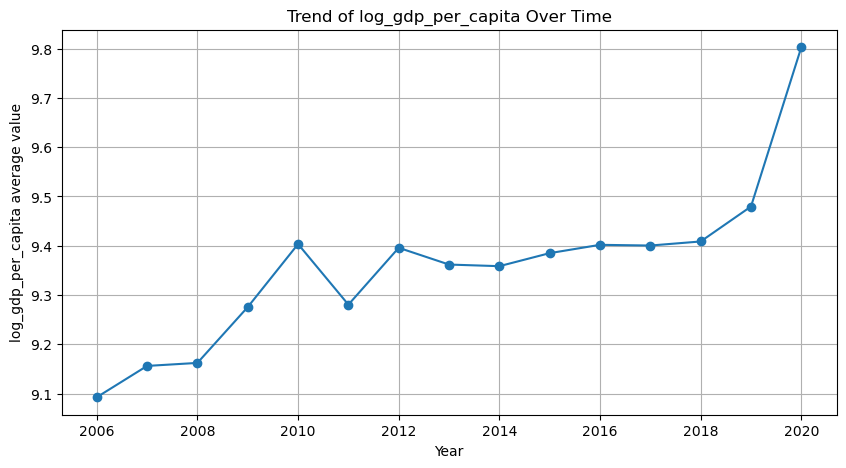

Change in log_gdp_per_capita average value from 2006 to 2020: 0.7097962755829723
Most documented countries: Argentina, Bolivia, Brazil, Cameroon, Chile, Colombia, Denmark, Dominican Republic, Ecuador, El Salvador, France, Georgia, Germany, Ghana, India, Israel, Italy, Japan, Kazakhstan, Kenya, Kyrgyzstan, Lithuania, Mexico, Moldova, Russia, South Africa, South Korea, Spain, Sweden, Tanzania, Thailand, Uganda, Ukraine, United Kingdom, Uruguay, Venezuela, Zimbabwe with 15 values.
Least documented countries: Cuba, Guyana, Suriname with 1 values.
Most changed countries per year:
country_name
Libya                       0.155500
Venezuela                   0.142339
Yemen                       0.137558
Central African Republic    0.102000
Laos                        0.089875
China                       0.079100
Djibouti                    0.077000
Zimbabwe                    0.071600
Sierra Leone                0.068250
United Arab Emirates        0.065455
dtype: float64
Least changed countr

<Figure size 640x480 with 0 Axes>

In [ ]:
# Run previously used functions for log GDP per capita
variable_plot(df_cleaned, 'log_gdp_per_capita')
value_change_stats(df_cleaned, 'log_gdp_per_capita')

#### 6.1.3 Perceptions of corruption

year
2005    0.699129
2006    0.747416
2007    0.794168
2008    0.760655
2009    0.764147
2010    0.756902
2011    0.745106
2012    0.745473
2013    0.758507
2014    0.736919
2015    0.728197
2016    0.736669
2017    0.722529
2018    0.731477
2019    0.717916
2020    0.702506
Name: perceptions_of_corruption, dtype: float64


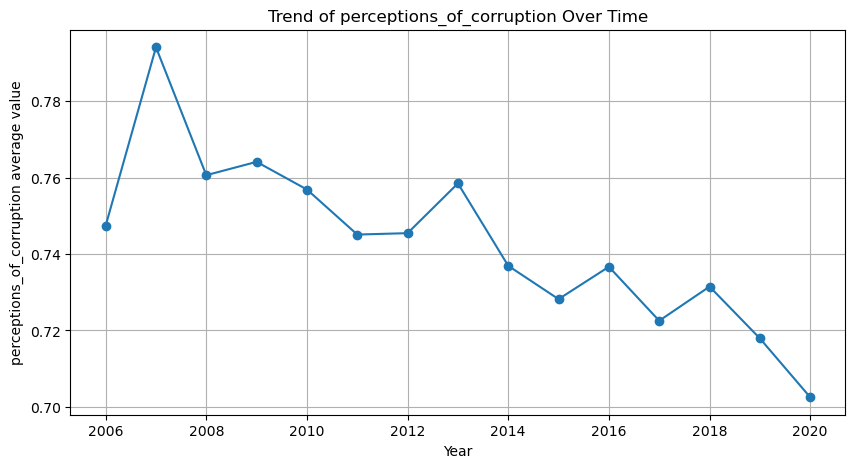

Change in perceptions_of_corruption average value from 2006 to 2020: 0.04491007796951685
Most documented countries: Argentina, Bolivia, Brazil, Cameroon, Chile, Colombia, Denmark, Dominican Republic, Ecuador, El Salvador, France, Georgia, Germany, Ghana, India, Israel, Italy, Japan, Kazakhstan, Kenya, Kyrgyzstan, Lithuania, Mexico, Moldova, Russia, South Africa, South Korea, Spain, Sweden, Tanzania, Thailand, Uganda, Ukraine, United Kingdom, Uruguay, Venezuela, Zimbabwe with 15 values.
Least documented countries: Cuba, Guyana, Suriname with 1 values.
Most changed countries per year:
country_name
Burundi       0.104600
Niger         0.087000
Swaziland     0.085667
Estonia       0.076357
Gambia        0.075333
Mauritania    0.075154
Georgia       0.074067
Haiti         0.069273
Paraguay      0.068077
Norway        0.067600
dtype: float64
Least changed countries per year:
country_name
China           0.000000
Cuba            0.000000
Guyana          0.000000
Qatar           0.000000
Surin

<Figure size 640x480 with 0 Axes>

In [ ]:
# Run previously used functions for perceptions of corruption
variable_plot(df_cleaned, 'perceptions_of_corruption')
value_change_stats(df_cleaned, 'perceptions_of_corruption')

### 6.2 Analysing relationship between variables

#### 6.2.1 Plotting correlations between most and least correlated variables
From the correlation matrix using the cleaned dataframe, I want to define a function that tells us the variable combinations with the highest correlation and lowest correlation, and plot them on a scatterplot for us.

Most correlated variable combinations:
                         Variable 1          Variable 2  Correlation Value
0  healthy_life_expectancy_at_birth  log_gdp_per_capita           0.843022
1                       life_ladder  log_gdp_per_capita           0.786909
2  healthy_life_expectancy_at_birth         life_ladder           0.748532
3                       life_ladder      social_support           0.709466
Least correlated variable combinations:
                  Variable 1                        Variable 2  \
0                 generosity                       life_ladder   
1                 generosity                    social_support   
2                 generosity  healthy_life_expectancy_at_birth   
3                 generosity                log_gdp_per_capita   
4  perceptions_of_corruption                    social_support   
5                 generosity         perceptions_of_corruption   

   Correlation Value  
0           0.193191  
1           0.067418  
2           0.

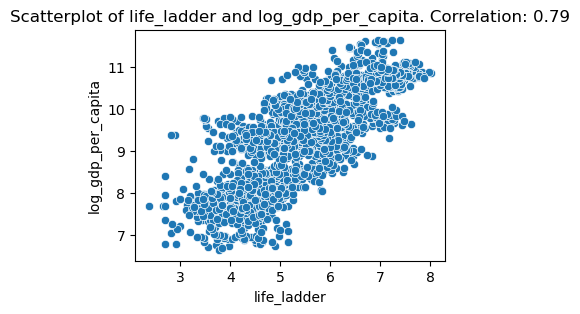

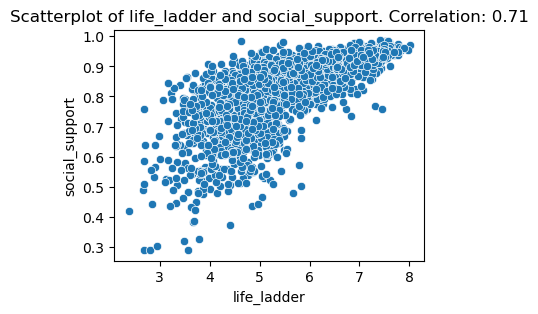

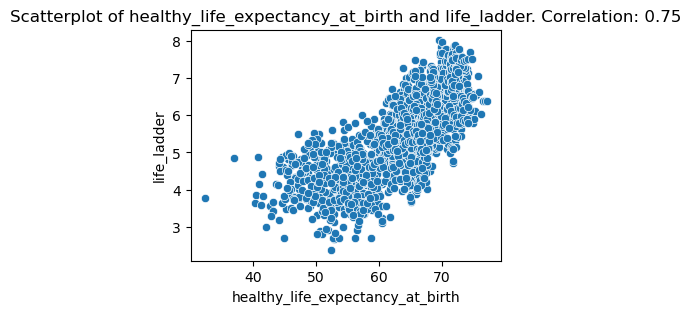

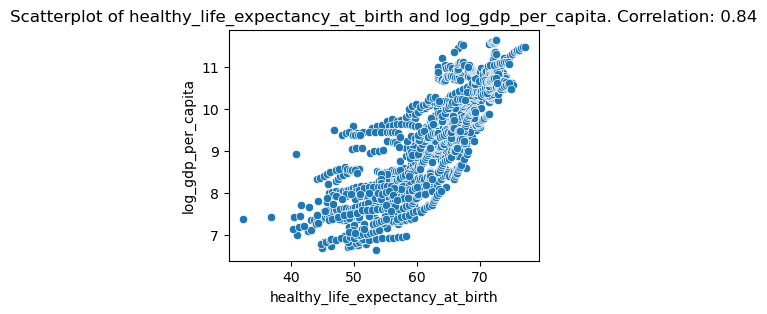

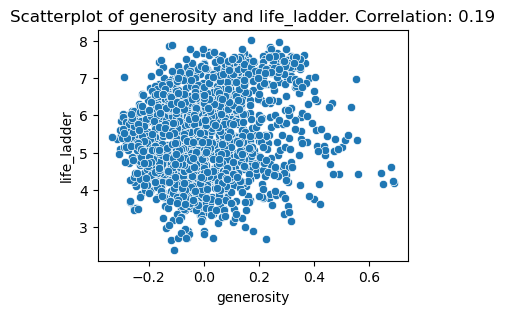

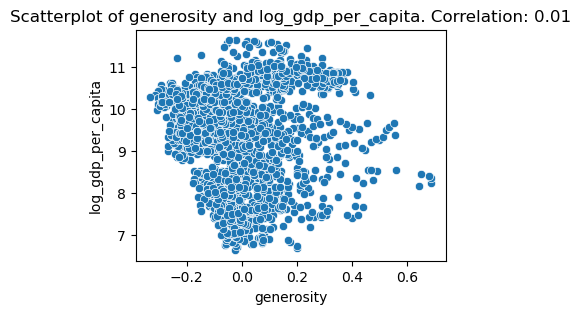

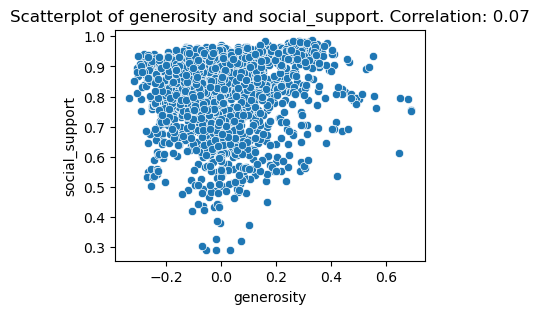

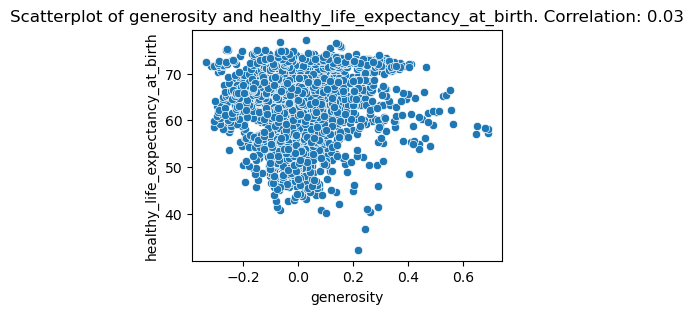

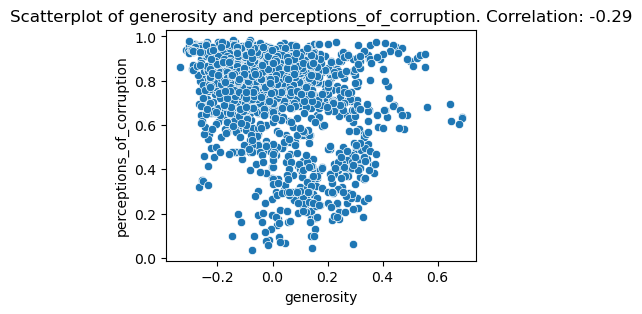

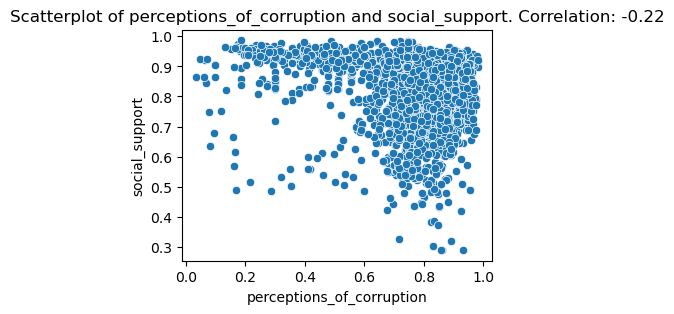

In [608]:
# Create a function that plots a scatter plot of the most and least correlated variables
def plot_most_least(correlation_matrix, data, high_threshold, low_threshold):
    # Compute dataframe with most correlated variable combinations
    high_correlation_pairs = [
    (row, col, correlation_matrix.loc[row, col])
    for row in correlation_matrix.index
    for col in correlation_matrix.columns
    if row < col and abs(correlation_matrix.loc[row, col]) >= high_threshold
    ]
    sorted_high_correlation_pairs = sorted(high_correlation_pairs, key = lambda x: x[2], reverse=True)
    most_correlated_pairs = pd.DataFrame(sorted_high_correlation_pairs, columns=['Variable 1', 'Variable 2', 'Correlation Value'])
    print(f"Most correlated variable combinations:\n{most_correlated_pairs}")

    # Compute dataframe with least correlated variable combinations
    low_correlation_pairs = [
    (row, col, correlation_matrix.loc[row, col])
    for row in correlation_matrix.index
    for col in correlation_matrix.columns
    if row < col and abs(correlation_matrix.loc[row, col]) <= low_threshold
    ]
    sorted_low_correlation_pairs = sorted(low_correlation_pairs, key = lambda x: x[2], reverse=True)
    least_correlated_pairs = pd.DataFrame(sorted_low_correlation_pairs, columns=['Variable 1', 'Variable 2', 'Correlation Value'])
    print(f"Least correlated variable combinations:\n{least_correlated_pairs}")
    
    # Plot the high threshold scatter plots
    for var1, var2, corr_value in high_correlation_pairs:
        plt.figure(figsize=(4,3))
        sns.scatterplot(x=data[var1], y=data[var2])
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f"Scatterplot of {var1} and {var2}. Correlation: {correlation_matrix.loc[var1, var2]:.2f}")
        plt.show()

    # Plot the low threshold scatter plots
    for var1, var2, corr_value in low_correlation_pairs:
        plt.figure(figsize=(4, 3))
        sns.scatterplot(x=data[var1], y=data[var2])
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f"Scatterplot of {var1} and {var2}. Correlation: {correlation_matrix.loc[var1, var2]:.2f}")
        plt.show()

plot_most_least(cleaned_correlation_matrix, df_cleaned, 0.7, 0.3)

# Create a list of variable combinations with a correlation value higher than 0.7
def most_least_correlated(matrix):
    high_correlation_pairs = [(row, col, matrix.loc[row, col])
    for row in matrix.index
    for col in matrix.columns
    if row < col and matrix.loc[row, col] >= 0.7]
    sorted_high_correlation_pairs = sorted(high_correlation_pairs, key = lambda x: x[2], reverse=True)
    print(sorted_high_correlation_pairs)
    most_correlated_pairs = pd.DataFrame(sorted_high_correlation_pairs, columns=['Variable 1', 'Variable 2', 'Correlation Value'])
    print(f"Most correlated variable combinations:\n{most_correlated_pairs}")

### 6.3 Variable clustering

I'm going to remove life expectancy and life ladder from the below list, because they are both highly correlated with log GDP. This will avoic redundant outputs from the K clustering. These clusters will be useful to describe groupings of countries and any characteristics that they might share.

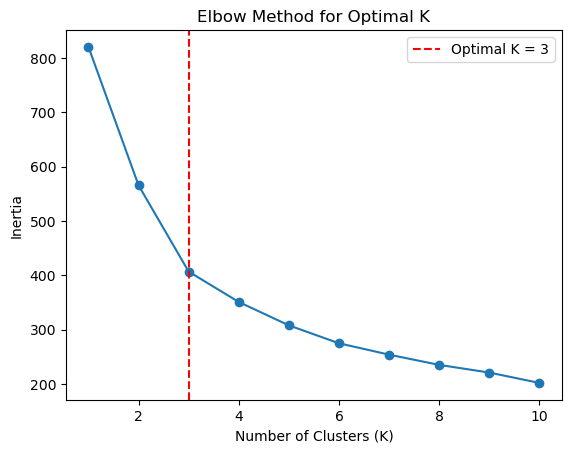

[[ 0.35335069  0.39646362 -0.08800934 -0.53175918  0.43025556]
 [ 1.0702625   0.85857963  1.17660394  1.19075688 -1.53340594]
 [-1.09131962 -1.03778208 -0.51537055  0.1142958   0.21839981]]
  country_name  cluster
0  Afghanistan        2
1  Afghanistan        2
2  Afghanistan        2
3  Afghanistan        2
4  Afghanistan        2
                year  life_ladder  log_gdp_per_capita  social_support  \
cluster                                                                 
0        2013.221414     5.653641            9.754266        0.851510   
1        2013.453216     6.799865           10.624575        0.913325   
2        2013.208403     4.404734            8.039326        0.692289   

         healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
cluster                                                                   
0                               66.102279                      0.728453   
1                               69.767170                      0.892424   


<Figure size 640x480 with 0 Axes>

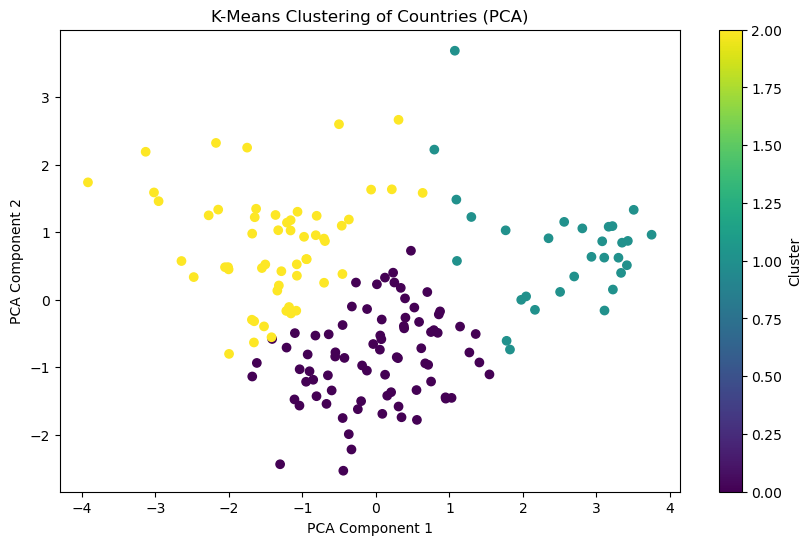

     country_name  cluster
12        Albania        0
25        Algeria        0
34      Argentina        0
49        Armenia        0
90     Azerbaijan        0
...           ...      ...
1689         Togo        2
1736       Uganda        2
1858        Yemen        2
1870       Zambia        2
1884     Zimbabwe        2

[164 rows x 2 columns]


In [609]:
# Scale variable values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df_cleaned.groupby('country_name').mean()  # Aggregate features
scaled_data = scaler.fit_transform(features[['log_gdp_per_capita', 'social_support', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']])

# Compute intertia for number of clusters in a range
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot line graph displaying elbow to determine number of clusters
optimal_k = 3
plt.plot(range(1, 11), inertia, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.legend()
plt.show()
plt.clf()

# Apply K means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned = df_cleaned.copy()
features['cluster'] = kmeans.fit_predict(scaled_data)

# Merge features with df_cleaned
df_cleaned = df_cleaned.merge(features[['cluster']], on='country_name', how='left')

# View the cluster centers to see which features dominate each cluster
print(kmeans.cluster_centers_)

# See the cluster assignments for each country
print(df_cleaned[['country_name', 'cluster']].head())

# Group by clusters and analyze mean values
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
print(df_cleaned.groupby('cluster')[numeric_columns].mean())

# Visualise the clusters with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=features['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Countries (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Generate dataframe of country names sorted by cluster number
df_cluster_country_name = df_cleaned[['country_name', 'cluster']].drop_duplicates()
df_cluster_country_name = df_cluster_country_name.sort_values(by=['cluster', 'country_name'], ascending=[True, True])
print(df_cluster_country_name)

## 7.0 Communicate your findings

### 7.1 Data and project summary

I accessed this dataset from Kaggle, and thought that it would be interesting to analyse variable trends and relationships between variables for country socio-economic data. It is a rich field which sits at the intersection of the objective and subjective, which I believe can tell many informative stories. 

The data is mostly numerical, except for country names. Many variables are the results of surveys taken on citizens of each country, for example perception of corruption. 

My goal was to clean the dataset, removing areas that were too missing, and imputing other areas, and to show variable trends and relationships. I did not come in with a defined goal in mind, though I did want to begin to group countries into similar clusters, and see out of interest if there were any correlations between variables. 

### 7.2 Key findings

#### 7.2.1 Univariate Analysis

##### 7.2.1.1 Life ladder (happiness)

The line chart in 6.1.1 shows us that life ladder, or happiness, values rose globally from 2006 to 2020. 

The most changed countries average life ladder values trended below the global average, suggesting that more varying countries have less stable situations, causing more varied happiness scores.

The least changed countries had a relatively narrow margin of average life ladder values (5.4-7.1), which suggests that the most stable countries stay around the average global value (5.2-5.8).

The ten most happy countries, defined by the ten countries being most frequently in the top ten each year for life ladder, are Denmark, Netherlands, Finland, Sweden, Canada, Norway, Switzerland, New Zealand, Australia, and Austria. The ten least happy countries are Rwanda, Tanzania, Afghanistan, Benin, Zimbabwe, Botswana, Burkina Faso, Chad, Haiti and Burundi. 

##### 7.2.1.2 Log GDP per capita

Log GDP per capita rose on average from 9.1 to 9.8 globally from 2006 to 2020. 

The ten most frequent countries in the top 10 for log GDP per capita were Ireland, United States, Singapore, Netherlands, Hong Kong SAR of China, Luxembourg, United Arab Emirates, Austria, Denmark and Norway. The ten most frequent countries in the bottom 10 were Niger, Malawi, Chad, Sierra Leone, Liberia, Madagascar, Togo, Congo, Haiti and Mozambique. 

##### 7.2.1.3 Perceptions of corruption

The global mean for perceptions of corruption decreased by 0.04 from 2006 to 2020. 

The ten most frequent countries in the top 10 for perceptions of corruption were Romania, Bosnia and Herzegovina, Bulgaria, Moldova, Ukraine, Lithuania, Indonesia, Kosovo, Portugal and Croatia. The ten most frequent countries in the bottom 10 were Denmark, Sweden, New Zealand, Finland, Singapore, Rwanda, United Arab Emirates, Switzerland, Norway and Australia. 

#### 7.2.2 Multivariate Analysis

##### 7.2.2.1 Correlations

The most correlated variable pairs were healthy life expectancy at birth & log GDP per capita (0.84), life ladder & log GDP per capita (0.78), healthy life expectancy at birth & life ladder (0.74), and life ladder & social support (0.70). I think these values make sense; more resources per capita would suggest better healthcare and ability for people to afford the things they need and enjoy. The added security of a good healthcare system would suggest a happier population. High happiness would also suggest a robust sense of community. Scatter plots for these correlations can be seen in 6.2.1. 

#### 7.2.3 Variable Clustering

K means clustering was used to group the dataset into clusters, with 3 being the optimal number. One cluster groups countries with a higher log GDP per capita, higher life ladder, higher social support, higher life expectancy at birth, higher freedom to make life choices, relatively higher generosity (though not a high value), and lower perceptions of corruption. These results make sense compared to expectations. Another cluster groups countries with lower log GDP per capita, lower life ladder, lower social support, lower life expectancy at birth, lower freedom to make life choices, relatively lower generosity (though not the lowest value of the clusters), and higher perceptions of corruption (though not the highest).

### 7.3 Limitations

* There were large amounts of data missing. This could be assumed to be missing due to poor reporting from many countries, which also reflected on their sometimes worse values. 
* Depending on how countries reported, there are temporal inconsistencies in where data is missing. 
* It would have been helpful to categorise countries into region to find relationships between clusters, for example, and geographical location. 
* It would have been more descriptive to have the 2021 dataset already included in the larger dataset. This would be an easy further step if I wanted to continue the project. 

## 8.0 Appendix
I've moved a bunch of the notebook to the appendix, where I initially analysed the data to check for any correlations amongst variables to decide how to impute. Retroactively, I defined a function to impute missing values through defining the mean, median or mode. 

#### Analysing missing log GDP values
I'd like to count how many times countries with missing log GDP values have missed a value. I think it will show if there are countries that largely don't report this information, or if there are countries where for some reason the value was not reported incidentally. 

In [610]:
# Create a new data frame that provides a count of how many times a country has a missing log GDP value
missing_log_gdp = df_cleaned[df_cleaned['log_gdp_per_capita'].isnull()].groupby('country_name').size()
print(missing_log_gdp.sort_values(ascending=False))

Series([], dtype: int64)


The data tells us that there are largely missing values for North Cyprus, Somaliland Region and South Sudan. I want to see what percentage of total values these countries have missing GDP values. 

In [611]:
# Create a count of each country's length
total_gdps_per_country = df_cleaned.groupby('country_name').size()
print(total_gdps_per_country)
# Calculate the percentage of each country's missing log GDP values
missing_percentage = missing_log_gdp / total_gdps_per_country * 100
print(missing_percentage.sort_values(ascending=False).head(20))

country_name
Afghanistan    12
Albania        13
Algeria         5
Angola          4
Argentina      15
               ..
Venezuela      15
Vietnam        11
Yemen          12
Zambia         14
Zimbabwe       15
Length: 164, dtype: int64
country_name
Afghanistan              NaN
Albania                  NaN
Algeria                  NaN
Angola                   NaN
Argentina                NaN
Armenia                  NaN
Australia                NaN
Austria                  NaN
Azerbaijan               NaN
Bahrain                  NaN
Bangladesh               NaN
Belarus                  NaN
Belgium                  NaN
Belize                   NaN
Benin                    NaN
Bhutan                   NaN
Bolivia                  NaN
Bosnia and Herzegovina   NaN
Botswana                 NaN
Brazil                   NaN
dtype: float64


Cuba, North Cyprus, South Sudan, Somaliland region and Somalia all have completely missing log GDP data, which I'd like to investigate compared with other variables to assess how it is missing. I'll choose social support, freedom to make life choices and perceptions of corruption as they are all continuous variables. I won't include affect because they are combinations of the positive and negative variables, respectively. 

For this I will calculate the correlation between these variables and missing log GDP. I'll also create two data frames which separates missing log GDP boolean values so I can compare the means of these same variables with either missing or non-missing log GDP values. If there are significant differences in mean, I can assume there is some correlation to investigate. 

In [612]:
# Create a binary column marking whether log GDP is missing or not
df_cleaned.loc[:, 'missing_log_gdp'] = df_cleaned['log_gdp_per_capita'].isna().astype(int)
# Create a list of continuous numerical variables to use in the following correlation calculation
continuous_vars = ['social_support', 'freedom_to_make_life_choices', 'perceptions_of_corruption']
# Calculate correlation between continuous variables and missing log GDP
correlations = df_cleaned[continuous_vars + ['missing_log_gdp']].corr()
print(correlations)
# Create two data frames with either True or False values for missing log GDP
missing_gdp = df_cleaned[df_cleaned['missing_log_gdp'] == 1]
non_missing_gdp = df_cleaned[df_cleaned['missing_log_gdp'] == 0]
# Calculate the means of the above variables for both only missing or non-missing log GDP values
print("Average social support for missing GDP:", missing_gdp['social_support'].mean())
print("Average social support for non-missing GDP:", non_missing_gdp['social_support'].mean())

print("Average freedom to make life choices for missing GDP:", missing_gdp['freedom_to_make_life_choices'].mean())
print("Average freedom to make life choices for non-missing GDP:", non_missing_gdp['freedom_to_make_life_choices'].mean())

print("Average corruption for missing GDP:", missing_gdp['perceptions_of_corruption'].mean())
print("Average corruption for non-missing GDP:", non_missing_gdp['perceptions_of_corruption'].mean())

                              social_support  freedom_to_make_life_choices  \
social_support                      1.000000                      0.411471   
freedom_to_make_life_choices        0.411471                      1.000000   
perceptions_of_corruption          -0.224272                     -0.490634   
missing_log_gdp                          NaN                           NaN   

                              perceptions_of_corruption  missing_log_gdp  
social_support                                -0.224272              NaN  
freedom_to_make_life_choices                  -0.490634              NaN  
perceptions_of_corruption                      1.000000              NaN  
missing_log_gdp                                     NaN              NaN  
Average social support for missing GDP: nan
Average social support for non-missing GDP: 0.8127551342812006
Average freedom to make life choices for missing GDP: nan
Average freedom to make life choices for non-missing GDP: 0.742301211

Because there seems to be no strong correlation between missing GDP and the other socio-economic variables, I am classing missing log GDP as missing at random, and I'll use the mean of the country's other GDP values to fill empty values. If the country has no log GDP value at all, I'll input the global log GDP mean. 

In [613]:
# Calculate global log GDP mean
mean_global_log_gdp = df_cleaned['log_gdp_per_capita'].mean()
print(f"Mean global log GDP per capita: {mean_global_log_gdp}")
# Group data frame by country and calculate each country's mean log GDP
country_means = df_cleaned.groupby('country_name')['log_gdp_per_capita'].transform('mean')
print(country_means)
# Fill missing log GDP values with country mean, when there is a mean
df_cleaned.loc[:, 'log_gdp_per_capita'] = df_cleaned['log_gdp_per_capita'].fillna(country_means)
# Fill remaining country's missing log GDP values with the global mean
df_cleaned.loc[:, 'log_gdp_per_capita'] = df_cleaned['log_gdp_per_capita'].fillna(mean_global_log_gdp)
print(df_cleaned)
# Run a check to see that there are no missing values in the column
print(df_cleaned.isnull().sum())

Mean global log GDP per capita: 9.373674052699945
0       7.650833
1       7.650833
2       7.650833
3       7.650833
4       7.650833
          ...   
1894    7.850333
1895    7.850333
1896    7.850333
1897    7.850333
1898    7.850333
Name: log_gdp_per_capita, Length: 1899, dtype: float64
     country_name  year  life_ladder  log_gdp_per_capita  social_support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1894     Zimbabwe  2016        3.735               7.984           0.768   
1895     Zimbabwe  2017        3.638               8.016           0.754   
1896     Zimbabwe  2018 

#### Analysing missing life expectancy values
I'll now move on to cleaning the life expectancy column. I'll repeat the steps of seeing which countries have most missing values, calculating the percentage of the country's total year entries, and then imputing missing values in the same way I did for log GDP.

In [614]:
# Create a new data frame that provides a count of how many times a country has a missing life expectancy value
missing_le = df_cleaned[df_cleaned['healthy_life_expectancy_at_birth'].isnull()].groupby('country_name').size()
print(missing_le.sort_values(ascending=False))
# Create a count of each country's length
total_le_per_country = df_cleaned.groupby('country_name').size()
print(total_le_per_country)
# Calculate the percentage of each country's missing life expectancy values
missing_percentage_le = missing_le / total_le_per_country * 100
print(missing_percentage_le.sort_values(ascending=False))
# Calculate global life expectancy mean
mean_global_le = df_cleaned['healthy_life_expectancy_at_birth'].mean()
print(f"Mean global healthy life expectancy at birth: {mean_global_le}")
# Group data frame by country and calculate each country's mean life expectancy
country_le_means = df_cleaned.groupby('country_name')['healthy_life_expectancy_at_birth'].transform('mean')
print(country_le_means)
# Fill missing life expectancy values with country mean, when there is a mean
df_cleaned.loc[:, 'healthy_life_expectancy_at_birth'] = df_cleaned['healthy_life_expectancy_at_birth'].fillna(country_means)
# Fill remaining country's missing life expectancy values with the global mean
df_cleaned.loc[:, 'healthy_life_expectancy_at_birth'] = df_cleaned['healthy_life_expectancy_at_birth'].fillna(mean_global_log_gdp)
# Run a check to see that there are no missing values in the column
print(df_cleaned.isnull().sum())

Series([], dtype: int64)
country_name
Afghanistan    12
Albania        13
Algeria         5
Angola          4
Argentina      15
               ..
Venezuela      15
Vietnam        11
Yemen          12
Zambia         14
Zimbabwe       15
Length: 164, dtype: int64
country_name
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Angola        NaN
Argentina     NaN
               ..
Venezuela     NaN
Vietnam       NaN
Yemen         NaN
Zambia        NaN
Zimbabwe      NaN
Length: 164, dtype: float64
Mean global healthy life expectancy at birth: 63.371674172828094
0       52.266667
1       52.266667
2       52.266667
3       52.266667
4       52.266667
          ...    
1894    50.233333
1895    50.233333
1896    50.233333
1897    50.233333
1898    50.233333
Name: healthy_life_expectancy_at_birth, Length: 1899, dtype: float64
country_name                        0
year                                0
life_ladder                         0
log_gdp_per_capita                  0
social_support 

#### Analysing missing generosity values
While numerous, at first glance, the missing generosity values appear to be missing completely at random. I will run the same checks to see if particular countries have not reported data at all.

In [615]:
# Create a new data frame that provides a count of how many times a country has a missing generosity value
missing_gen = df_cleaned[df_cleaned['generosity'].isnull()].groupby('country_name').size()
print(f"Countries with number of missing generosity values:\n{missing_gen.sort_values(ascending=False)}")
# Create a count of each country's length
total_gen_per_country = df_cleaned.groupby('country_name').size()
print(total_gen_per_country)
# Calculate the percentage of each country's missing generosity values
missing_percentage_gen = missing_gen / total_gen_per_country * 100
print(missing_percentage_gen.sort_values(ascending=False))
# Calculate global generosity mean
mean_global_gen = df_cleaned['generosity'].mean()
print(f"Mean global healthy generosity: {mean_global_gen}")
# Group data frame by country and calculate each country's mean generosity
country_gen_means = df_cleaned.groupby('country_name')['generosity'].transform('mean')
print(country_gen_means)
# Fill missing generosity values with country mean, when there is a mean
df_cleaned.loc[:, 'generosity'] = df_cleaned['generosity'].fillna(country_gen_means)
# Fill remaining country's missing generosity values with the global mean
df_cleaned.loc[:, 'generosity'] = df_cleaned['generosity'].fillna(mean_global_gen)
# Run a check to see that there are no missing values in the column
print(df_cleaned.isnull().sum())

Countries with number of missing generosity values:
Series([], dtype: int64)
country_name
Afghanistan    12
Albania        13
Algeria         5
Angola          4
Argentina      15
               ..
Venezuela      15
Vietnam        11
Yemen          12
Zambia         14
Zimbabwe       15
Length: 164, dtype: int64
country_name
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Angola        NaN
Argentina     NaN
               ..
Venezuela     NaN
Vietnam       NaN
Yemen         NaN
Zambia        NaN
Zimbabwe      NaN
Length: 164, dtype: float64
Mean global healthy generosity: 0.0007624096452424171
0       0.070083
1       0.070083
2       0.070083
3       0.070083
4       0.070083
          ...   
1894   -0.083000
1895   -0.083000
1896   -0.083000
1897   -0.083000
1898   -0.083000
Name: generosity, Length: 1899, dtype: float64
country_name                        0
year                                0
life_ladder                         0
log_gdp_per_capita                  0
social_

#### Analysing missing perceptions of corruption values
This data variable seems significant, because from a common-sense perspective, one would think that there is a relationship between a lot of socio-economic factors and the level of corruption in a country. I'd like to see first off how the data perceives the correlation between perceptions of corruption with other variables, before I decide how to clean this column or impute it. 

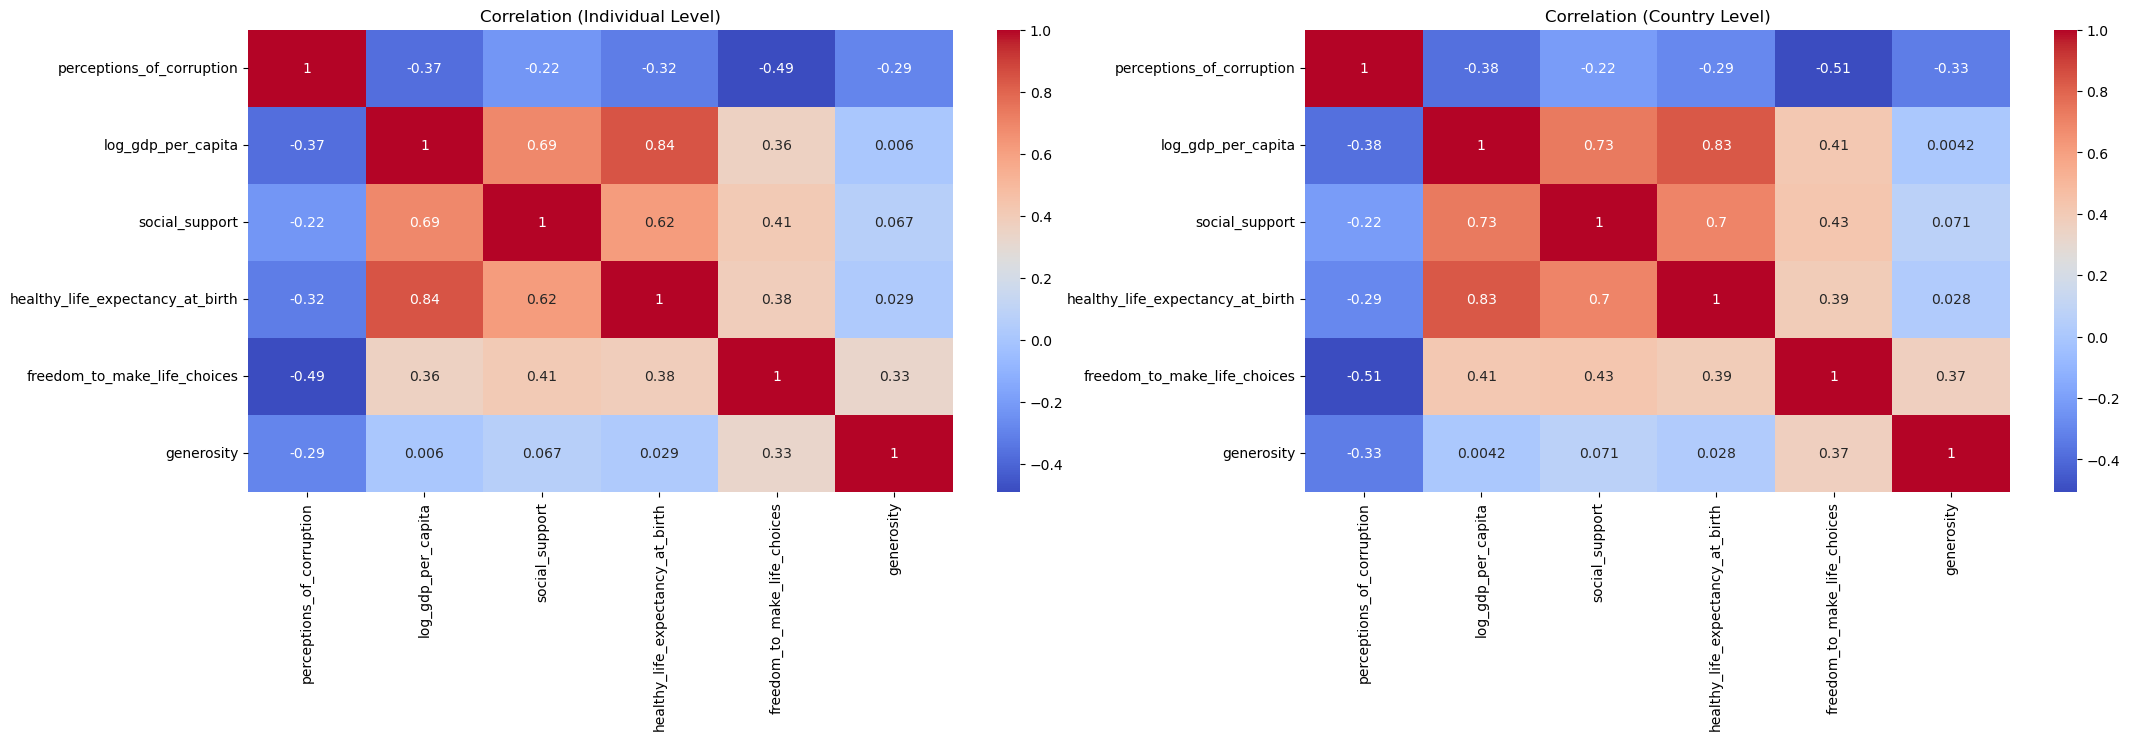

In [616]:
# Create a correlation matrix for perception of corruption with other variables
cleaned_correlation_matrix = df_cleaned[['perceptions_of_corruption', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices', 'generosity']].corr()
# Create data frame with cleaned results grouped by country and averaged for each column
df_grouped = df_cleaned.groupby('country_name').mean()
# Create a correlation matrix for perception of corruption with other variables, based on data frame grouped by country
grouped_correlation_matrix = df_grouped[['perceptions_of_corruption', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices', 'generosity']].corr()
# Plot both correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(25, 6))
sns.heatmap(cleaned_correlation_matrix, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation (Individual Level)")
sns.heatmap(grouped_correlation_matrix, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation (Country Level)")
plt.show()

It appears that there's no relationship between perceptions of corruption and other variables, either in the cleaned dataset or one that is grouped by country. Interestingly, there is a somewhat strong inverse relationship between perception of corruption and freedom to make life choices, which could be worth exploring further. 
There are other relationships I want to explore further during the EDA stage, such as relationships between GDP and other variables. 
I'm going to impute the missing with linear regression. 